# ML Olympiad : Nashik Weather

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
df = pd.read_csv("/content/train.csv")

In [103]:
df.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,1323,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,1362,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,1079,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,1148,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,1694,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [104]:
print(df.isnull().sum())

month                0
year                 0
ID                   0
tempmax              0
tempmin              0
temp                 0
dew                  0
humidity             0
windgust             7
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
weather-condition    0
dtype: int64


so we can see that we found some null values in the data set


In [105]:
print(df.windgust)

0      18.6
1      11.2
2      19.7
3      27.1
4      18.8
       ... 
629    11.4
630    22.1
631     8.9
632    15.4
633    25.5
Name: windgust, Length: 634, dtype: float64


In [106]:
# Replace null values with mean
mean_windgust = df['windgust'].mean()
df['windgust'].fillna(mean_windgust, inplace=True)


In [107]:
print(df.isnull().sum())

month                0
year                 0
ID                   0
tempmax              0
tempmin              0
temp                 0
dew                  0
humidity             0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
weather-condition    0
dtype: int64


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              634 non-null    int64  
 1   year               634 non-null    int64  
 2   ID                 634 non-null    int64  
 3   tempmax            634 non-null    float64
 4   tempmin            634 non-null    float64
 5   temp               634 non-null    float64
 6   dew                634 non-null    float64
 7   humidity           634 non-null    float64
 8   windgust           634 non-null    float64
 9   windspeed          634 non-null    float64
 10  winddir            634 non-null    float64
 11  sealevelpressure   634 non-null    float64
 12  cloudcover         634 non-null    float64
 13  visibility         634 non-null    float64
 14  solarradiation     634 non-null    float64
 15  solarenergy        634 non-null    float64
 16  weather-condition  634 non

its look all data type in the right, so need to do any changes


In [109]:
all_columns = df.columns
print(all_columns)

Index(['month', 'year', 'ID', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'weather-condition'],
      dtype='object')


EDA

In [110]:
df.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,1323,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,1362,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,1079,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,1148,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,1694,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [111]:
df_copy=df.drop([	'month','year','ID'], axis=1)

In [112]:
df_copy.head()

,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [113]:
df_copy['weather-condition'].value_counts()

rain                 244
clear-day            237
partly-cloudy-day    153
Name: weather-condition, dtype: int64

One-hot-Encoding

In [114]:
weather_mapping = {
    'rain': 2,
    'clear-day': 0,
    'partly-cloudy-day': 1
}

# Map the 'weather-condition' column using the defined mapping
df_copy['weather-condition'] = df_copy['weather-condition'].map(weather_mapping)

In [115]:
df_copy.head()

,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,0
1,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,0
2,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,1
3,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,0
4,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,2


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<ipython-input-117-cd6d66812410>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


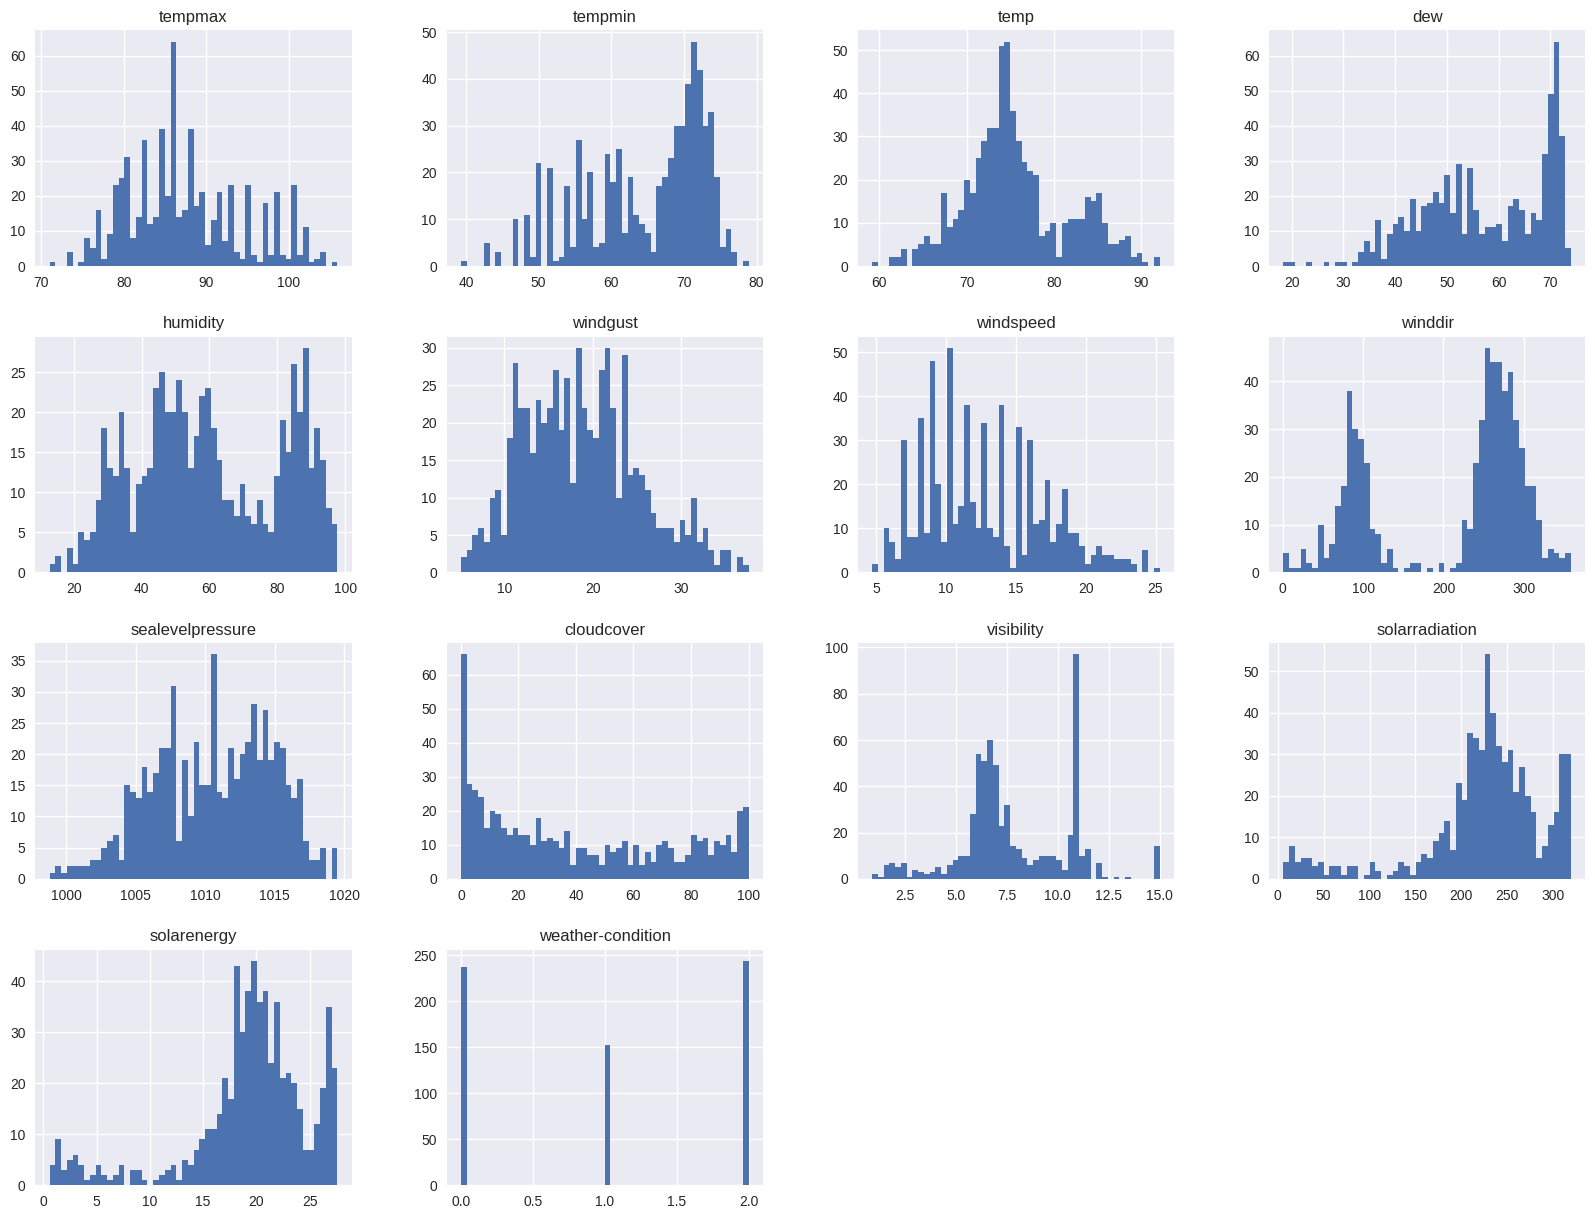

In [117]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [118]:
percentage=df_copy["weather-condition"].value_counts(normalize=True)*100

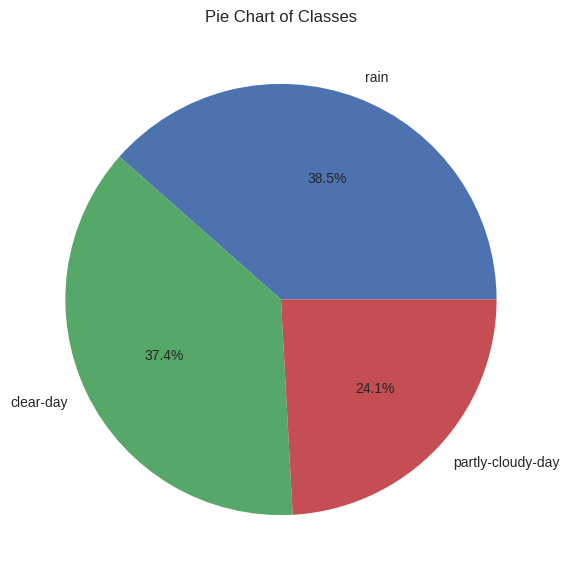

In [120]:
classlables = ["rain", "clear-day", "partly-cloudy-day"]
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=classlables, autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()


<Axes: >

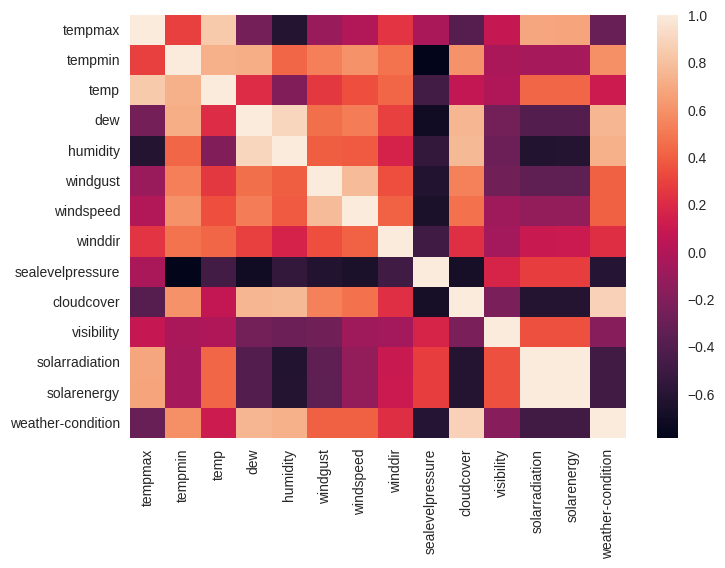

In [121]:
sns.heatmap(df_copy.corr())

In [122]:
df_copy.corr()

,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
tempmax,1.000000,0.293631,0.843324,-0.252336,-0.619440,-0.101199,-0.000045,0.244664,-0.041358,-0.389906,0.083250,0.680589,0.678303,-0.309980
tempmin,0.293631,1.000000,0.729430,0.714152,0.422749,0.518066,0.596188,0.470018,-0.790035,0.597139,-0.040034,-0.050863,-0.049704,0.583915
temp,0.843324,0.729430,1.000000,0.202950,-0.208265,0.252143,0.341750,0.420090,-0.473859,0.069737,-0.016552,0.426035,0.424826,0.107315
dew,-0.252336,0.714152,0.202950,1.000000,0.899734,0.457031,0.512536,0.289318,-0.711443,0.753472,-0.259479,-0.402129,-0.399746,0.749439
humidity,-0.619440,0.422749,-0.208265,0.899734,1.000000,0.398181,0.382787,0.160479,-0.549526,0.767064,-0.294758,-0.622541,-0.619506,0.731939
windgust,-0.101199,0.518066,0.252143,0.457031,0.398181,1.000000,0.779377,0.335855,-0.628358,0.529308,-0.277255,-0.348628,-0.350695,0.403629
windspeed,-0.000045,0.596188,0.341750,0.512536,0.382787,0.779377,1.000000,0.409038,-0.663350,0.465802,-0.081720,-0.128733,-0.127215,0.404951
winddir,0.244664,0.470018,0.420090,0.289318,0.160479,0.335855,0.409038,1.000000,-0.487857,0.219495,-0.059784,0.096135,0.099453,0.210919
sealevelpressure,-0.041358,-0.790035,-0.473859,-0.711443,-0.549526,-0.628358,-0.663350,-0.487857,1.000000,-0.682364,0.167334,0.275086,0.272866,-0.612732
cloudcover,-0.389906,0.597139,0.069737,0.753472,0.767064,0.529308,0.465802,0.219495,-0.682364,1.000000,-0.232413,-0.619889,-0.618048,0.878198


In [123]:
X=df_copy.drop('weather-condition',axis=1)
y=df_copy['weather-condition']

In [124]:
X.head()

,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9
1,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7
2,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8
3,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3
4,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1


In [125]:
y.head()

0    0
1    0
2    1
3    0
4    2
Name: weather-condition, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
X_train.shape,X_test.shape

((507, 13), (127, 13))

Feature scaling or Standardization

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
#box plot to understand effect of standard Scalar


<ipython-input-130-057aa343fe2c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after Scaling')

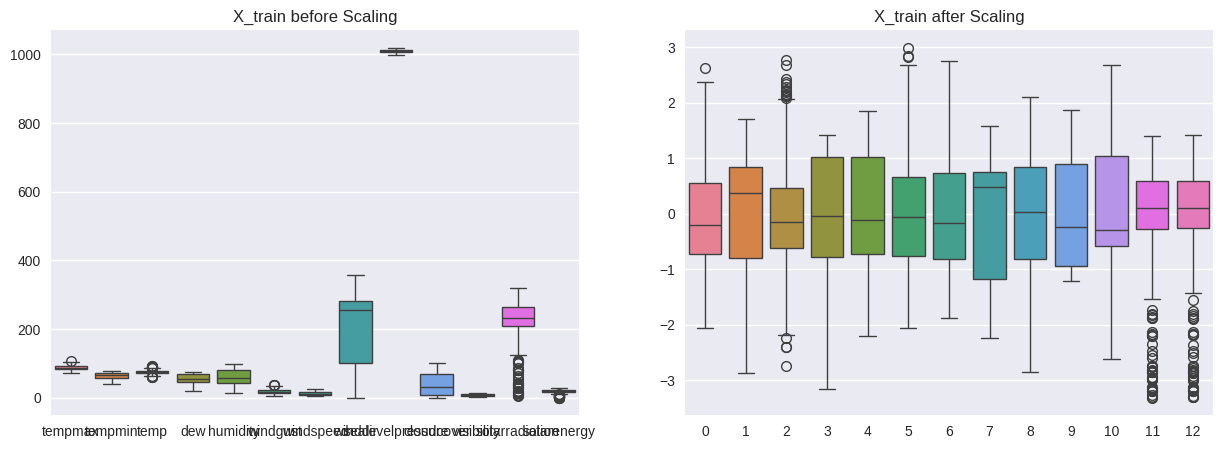

In [130]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling')



before there are some many outliers and all at different units , after all are at same scale

In [131]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [132]:
y_pred = model.predict(X_test_scaled)


In [133]:
report = classification_report(y_test, y_pred, target_names=weather_mapping.keys())
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

             rain       0.98      0.98      0.98        44
        clear-day       0.81      0.96      0.88        26
partly-cloudy-day       0.98      0.89      0.94        57

         accuracy                           0.94       127
        macro avg       0.92      0.94      0.93       127
     weighted avg       0.94      0.94      0.94       127



In [134]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.9381611581507405


In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
# Applying SMOTE for over-sampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [138]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [139]:
# Make predictions
y_pred = model.predict(X_test)


In [140]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score after handling imbalanced data:", f1)

F1 Score after handling imbalanced data: 0.9225366755279275


In [144]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [147]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [145]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [148]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [149]:
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=f1_scorer)


In [150]:
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Cross-Validation F1 Scores: [0.93197279 0.95885475 0.95176748 0.97236574 0.95887199]
Mean F1 Score: 0.9547665506517682
